In [1]:
from keras.preprocessing.image import load_img, img_to_array
from xgboost import XGBClassifier
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
plt.style.use('dark_background')

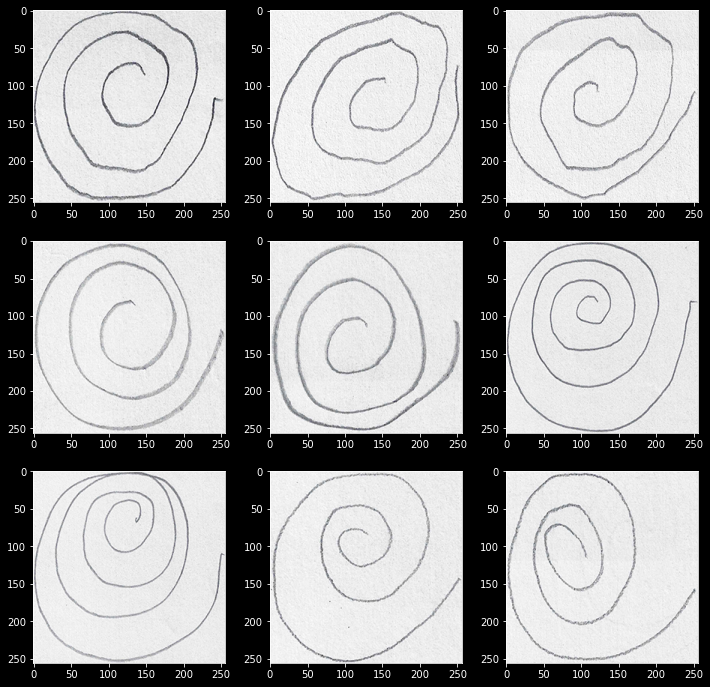

In [2]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("desktop/spiral/training/healthy/"+
                  os.listdir("desktop/spiral/training/healthy")[i])
    plt.imshow(img)   
plt.show() 

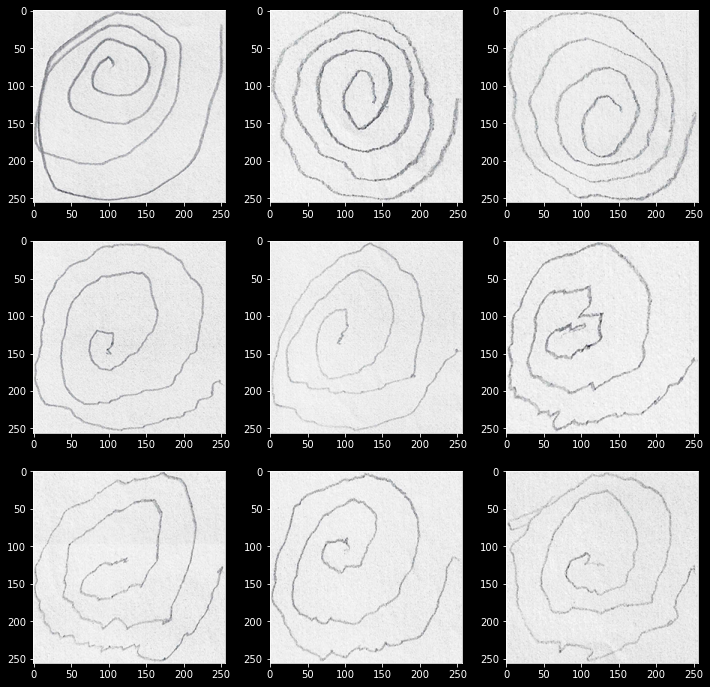

In [3]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("desktop/spiral/training/parkinson/"+
                  os.listdir("desktop/spiral/training/parkinson")[i])
    plt.imshow(img)   
plt.show()

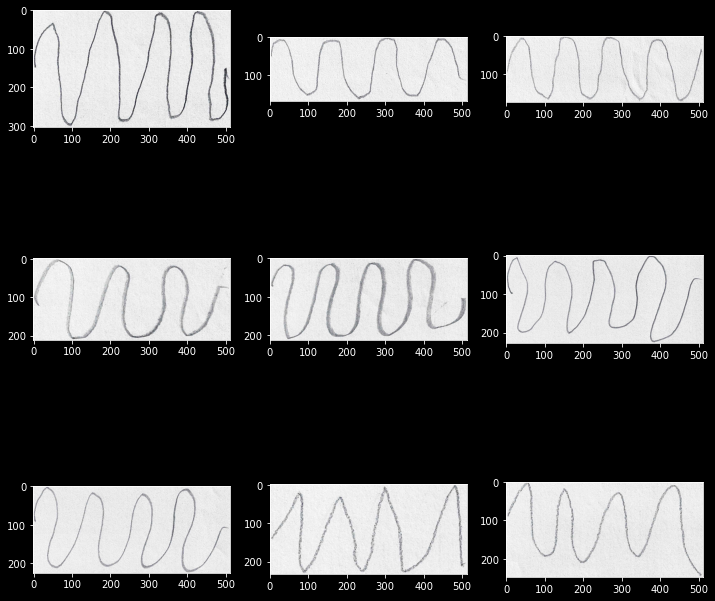

In [4]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("desktop/wave/training/healthy/"+
                  os.listdir("desktop/wave/training/healthy")[i])
    plt.imshow(img)   
plt.show()

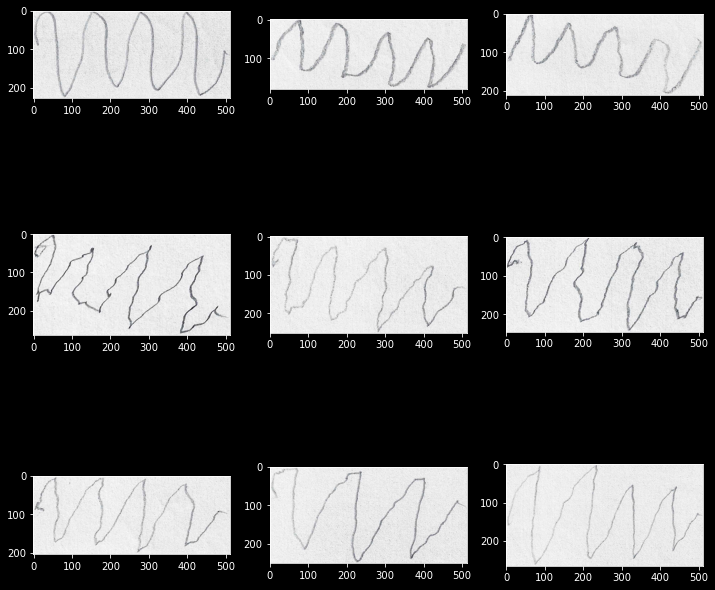

In [5]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("desktop/wave/training/parkinson/"+
                  os.listdir("desktop/wave/training/parkinson")[i])
    plt.imshow(img)   
plt.show()

# Importing CNN

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [7]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(128, 128, 3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(activation='relu',units=16, name="my_dense"))
classifier.add(Dense(activation='sigmoid',units=1))

In [8]:
from keras.models import Model
layer_name='my_dense'
intermediate_layer_model = Model(inputs=classifier.input,
                                 outputs=classifier.get_layer(layer_name).output)

intermediate_layer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0     

# Image Data Generator Dataset

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
spiral_train_generator = train_datagen.flow_from_directory('desktop/spiral/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

spiral_test_generator = test_datagen.flow_from_directory('desktop/spiral/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [12]:
wave_train_generator = train_datagen.flow_from_directory('desktop/wave/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

wave_test_generator = test_datagen.flow_from_directory('desktop/wave/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [13]:
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,reduce_learningrate]

classifier.compile(loss='binary_crossentropy',
              optimizer = Adam(lr=0.005),
              metrics=['accuracy'])

C:\Users\syeda\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
history = classifier.fit_generator(
        spiral_train_generator,
        steps_per_epoch=spiral_train_generator.n//spiral_train_generator.batch_size,
        epochs=10,
        validation_data=spiral_test_generator,
        validation_steps=spiral_test_generator.n//spiral_test_generator.batch_size,
        callbacks=callbacks_list)

<ipython-input-14-a2f041bbe9ab>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(


Epoch 1/10
2/2 [==============================] - 5s 1s/step - loss: 4.5805 - accuracy: 0.6000 - lr: 0.0050
Epoch 2/10
2/2 [==============================] - 1s 338ms/step - loss: 2.1641 - accuracy: 0.4375 - lr: 0.0050
Epoch 3/10
2/2 [==============================] - 1s 354ms/step - loss: 0.6989 - accuracy: 0.4688 - lr: 0.0050
Epoch 4/10
2/2 [==============================] - 1s 128ms/step - loss: 0.6942 - accuracy: 0.5250 - lr: 0.0050
Epoch 5/10
2/2 [==============================] - 1s 369ms/step - loss: 0.6928 - accuracy: 0.5469 - lr: 0.0050
Epoch 6/10
2/2 [==============================] - 1s 129ms/step - loss: 0.6932 - accuracy: 0.5000 - lr: 0.0050
Epoch 7/10
2/2 [==============================] - 1s 111ms/step - loss: 0.6935 - accuracy: 0.4750 - lr: 0.0050
Epoch 8/10
2/2 [==============================] - 1s 395ms/step - loss: 0.6932 - accuracy: 0.5000 - lr: 0.0050
Epoch 9/10
2/2 [==============================] - 1s 397ms/step - loss: 0.7666 - accuracy: 0.4750 - lr: 0.0050
Epoc

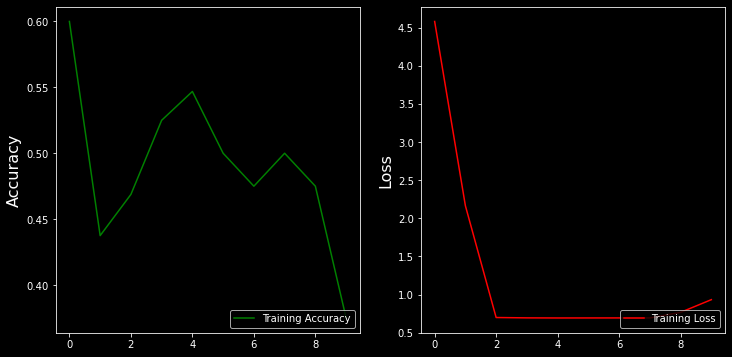

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'green')
plt.legend(loc='lower right')



plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
plt.show()

In [16]:
X_train = []
X_test = []
Y_train = []
Y_test = []

for i, batch in enumerate(spiral_train_generator):
    X_train.append(batch[0])
    Y_train.append(batch[1])
    i += 1
    if i>=2:
        break

for i, batch in enumerate(spiral_test_generator):
    X_test.append(batch[0])
    Y_test.append(batch[1])
    i += 1
    if i>=5:
        break

In [17]:
X_train = np.concatenate(X_train, axis=0)
Y_train = np.concatenate(Y_train, axis=0)

X_test = np.concatenate(X_test, axis=0)
Y_test = np.concatenate(Y_test, axis=0)

In [18]:
train_intermediate_output = intermediate_layer_model.predict(X_train)
test_intermediate_output = intermediate_layer_model.predict(X_test)

In [19]:
xgbmodel = XGBClassifier(objective='multi:softmax', num_class = 2, max_depth=4)
xgbmodel.fit(train_intermediate_output, Y_train)
xgb_test = xgbmodel.predict(test_intermediate_output)

xgb_test = xgbmodel.predict(test_intermediate_output)

accuracy_score(Y_test, xgb_test)*100

63.33333333333333

In [20]:
xgb_test

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])